In [1]:
import matplotlib.pyplot as plt
%matplotlib
import json
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

def encode_target(df, target_column):
    """Add column to df with integers for the target.

    Args
    ----
    df -- pandas DataFrame.
    target_column -- column to map to int, producing
                     new Target column.

    Returns
    -------
    df_mod -- modified DataFrame.
    targets -- list of target names.
    """
    df_mod = df.copy()
    targets = df_mod[target_column].unique()
    map_to_int = {name: n for n, name in enumerate(targets)}
    df_mod["Operation"] = df_mod[target_column].replace(map_to_int)

    return (df_mod, targets)

Using matplotlib backend: TkAgg


In [2]:
# load test.csv et train.csv
test = pd.read_csv('test.csv')
test
train = pd.read_csv('train.csv')



In [18]:
frame = DataFrame(test)
testDataCor=test.loc[test['Type Operation'].isin(['CASH_OUT','TRANSFER'])]
trainDataCor=train.loc[train['Type Operation'].isin(['CASH_OUT','TRANSFER'])]

,Type Operation,Montant,Cpt Source,Montant Cpt Source avt,Montant Cpt Source aft,Cpt Dest,Montant Cpt Dest,Montant Cpt Dest.1,Fraude
0,TRANSFER,685452.64,C1704791286,0.00,0.00,C438188216,12050518.26,12735970.90,0
9,CASH_OUT,222235.49,C2072161055,0.00,0.00,C2050019814,5151740.59,5213423.73,0
12,TRANSFER,1551633.18,C617778349,0.00,0.00,C754887543,2844565.19,3445779.88,0
14,CASH_OUT,27182.52,C675416828,0.00,0.00,C2029518292,359525.05,386707.57,0
15,CASH_OUT,114647.25,C440708219,70538.00,0.00,C2017318515,99535.81,214183.06,0
19,CASH_OUT,122108.63,C1509452962,0.00,0.00,C579882629,207434.04,329542.67,0
20,CASH_OUT,114656.77,C475195102,15249.00,0.00,C1151328915,530972.61,645629.38,0
21,CASH_OUT,527400.47,C472265625,149646.00,0.00,C326738344,0.00,527400.47,0
25,TRANSFER,217306.60,C1148599951,30775.00,0.00,C2002453856,62685.81,279992.41,0
26,CASH_OUT,118913.12,C112944873,77194.00,0.00,C243773315,130136.01,249049.13,0


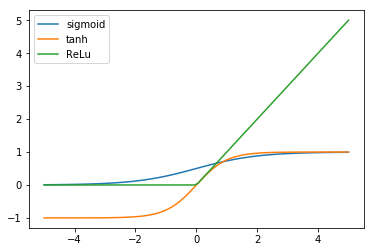

In [4]:


import numpy as np
import matplotlib.pyplot as plt
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-5, 5, 100)
sigmoid_x = sigmoid(x)
tanh_x    = np.tanh(x)
ReLu_x    = np.maximum(0, x)

figure = plt.figure()
plt.plot(x, sigmoid_x, label="sigmoid")
plt.plot(x, tanh_x,    label="tanh")
plt.plot(x, ReLu_x,    label="ReLu")
plt.legend()
plt.show()

In [5]:
#Pour train
y_train=trainDataCor.iloc[:,8].copy() 
x=trainDataCor.iloc[:,:8].copy()

df1, targets = encode_target(x, "Type Operation")
print(targets)

features = ['Montant', 'Montant Cpt Source avt', 'Montant Cpt Source aft', 'Montant Cpt Dest', 'Montant Cpt Dest.1', 'Operation']
print("* features:", features, sep="\n")
X_train = df1[features]

#Pour test
y_test=testDataCor.iloc[:,8].copy() 
x_test=testDataCor.iloc[:,:8].copy() 

df2, targets = encode_target(x_test, "Type Operation")

X_test = df2[features]

['TRANSFER' 'CASH_OUT']
* features:
['Montant', 'Montant Cpt Source avt', 'Montant Cpt Source aft', 'Montant Cpt Dest', 'Montant Cpt Dest.1', 'Operation']


In [22]:
X_test

,Montant,Montant Cpt Source avt,Montant Cpt Source aft,Montant Cpt Dest,Montant Cpt Dest.1,Operation
1,1158070.88,1158070.88,0.00,0.00,0.00,0
2,67128.33,67128.33,0.00,623880.13,691008.45,1
3,495002.26,25008.00,0.00,0.00,495002.26,1
4,615954.92,615954.92,0.00,0.00,0.00,0
5,8994286.69,8994286.69,0.00,0.00,8994286.69,1
6,623152.72,623152.72,0.00,847223.26,1470375.97,1
9,220799.50,0.00,0.00,394666.15,615465.65,1
10,146729.67,146729.67,0.00,0.00,146729.67,1
11,277995.36,0.00,0.00,3404746.04,3682741.40,1
13,183363.36,36.00,0.00,189948.53,373311.89,1


In [6]:

import scipy
from sklearn.neural_network import MLPClassifier

network = MLPClassifier()
network.fit(X_train, y_train)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

LBFGS
  Train accuracy: 0.7386678574154297
  Test  accuracy: 0.2928047968021319


In [7]:




nn_3 = MLPClassifier(hidden_layer_sizes=(20,20),
                     activation="tanh",
                     max_iter=5000, random_state=0)
nn_3.fit(X_train, y_train)
print("2 hidden layers of 20 neurons")
print("  Train accuracy:", nn_3.score(X_train, y_train))
print("  Test  accuracy:", nn_3.score(X_test, y_test))

2 hidden layers of 20 neurons
  Train accuracy: 0.9970588201790908
  Test  accuracy: 0.3342771485676216


In [42]:


# model
model = MLPClassifier(hidden_layer_sizes=(40,1600,40),
                        activation="identity", 
                        max_iter=5000,
                        random_state=0)
model.fit(X_train, y_train)
print("Identity activation")
print("  Train accuracy:", model.score(X_train, y_train))
print("  Test  accuracy:", model.score(X_test, y_test))



Identity activation


MemoryError: 